In [41]:
!pip install wordcloud
!pip install seaborn

In [1]:
# import libraries for reading data, exploring and plotting
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline
# library for train test split
from sklearn.model_selection import train_test_split
# deep learning libraries for text pre-processing
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Modeling
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D,GlobalAveragePooling2D, Dense, Dropout, LSTM, Bidirectional

In [2]:
url = 'https://raw.githubusercontent.com/ShresthaSudip/SMS_Spam_Detection_DNN_LSTM_BiLSTM/master/SMSSpamCollection'
messages = pd.read_csv(url, sep ='\t',names=["label", "message"])
messages[:3]

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [3]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [4]:
duplicatedRow = messages[messages.duplicated()]
print(duplicatedRow[:5])

    label                                            message
103   ham  As per your request 'Melle Melle (Oru Minnamin...
154   ham  As per your request 'Melle Melle (Oru Minnamin...
207   ham  As I entered my cabin my PA said, '' Happy B'd...
223   ham                             Sorry, I'll call later
326   ham                   No calls..messages..missed calls


In [5]:
messages.groupby('label').describe().T

label                              ham  \
message count                     4825   
        unique                    4516   
        top     Sorry, I'll call later   
        freq                        30   

label                                                        spam  
message count                                                 747  
        unique                                                653  
        top     Please call our customer service representativ...  
        freq                                                    4

In [6]:
# Get all the ham and spam emails
ham_msg = messages[messages.label =='ham']
spam_msg = messages[messages.label=='spam']# Create numpy list to visualize using wordcloud
ham_msg_text = " ".join(ham_msg.message.to_numpy().tolist())
spam_msg_text = " ".join(spam_msg.message.to_numpy().tolist())

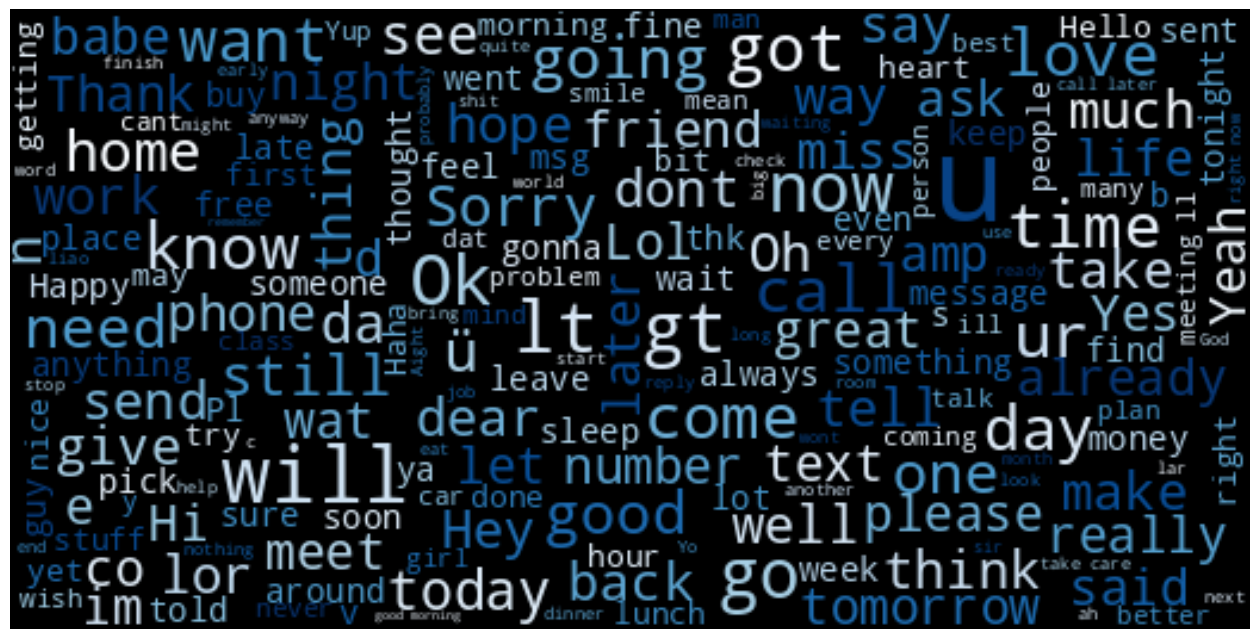

In [7]:
# wordcloud of ham messages
ham_msg_cloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, background_color ="black", colormap='Blues').generate(ham_msg_text)
plt.figure(figsize=(16,10))
plt.imshow(ham_msg_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()

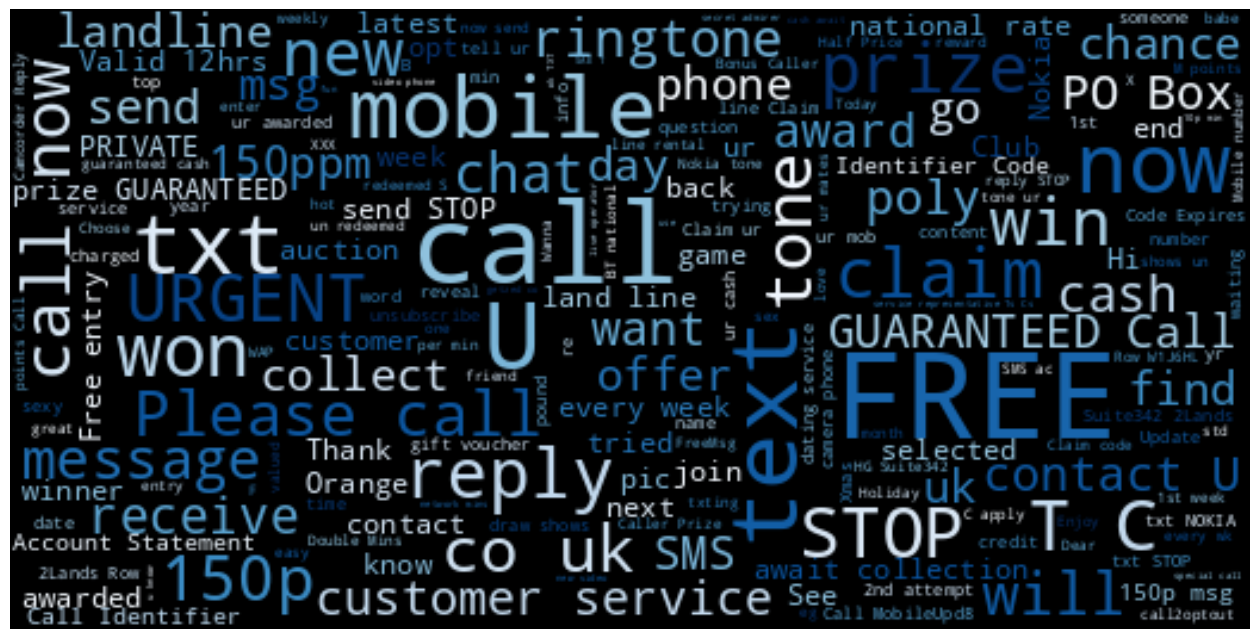

In [8]:
# wordcloud of spam messages
spam_msg_cloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, background_color ="black", colormap='Blues').generate(spam_msg_text)
plt.figure(figsize=(16,10))
plt.imshow(spam_msg_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()

sns.countplot(data=df, x="class", hue="alive")

https://seaborn.pydata.org/generated/seaborn.countplot.html

15.481865284974095

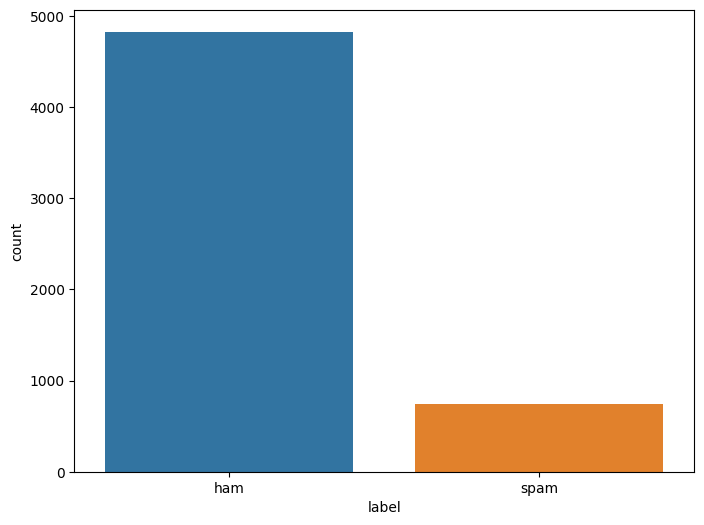

In [9]:
# we can observe imbalance data here
plt.figure(figsize=(8,6))
sns.countplot(data=messages,x="label")
# Percentage of spam messages
(len(spam_msg)/len(ham_msg))*100 # 15.48%

In [10]:
# one way to fix it is to downsample the ham msg
ham_msg_df = ham_msg.sample(n = len(spam_msg), random_state = 44)
spam_msg_df = spam_msg

print(ham_msg_df.shape, spam_msg_df.shape)

(747, 2) (747, 2)


<ipython-input-11-3fb4c7456faf>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  msg_df = ham_msg_df.append(spam_msg_df).reset_index(drop=True)


Text(0.5, 0, 'Message types')

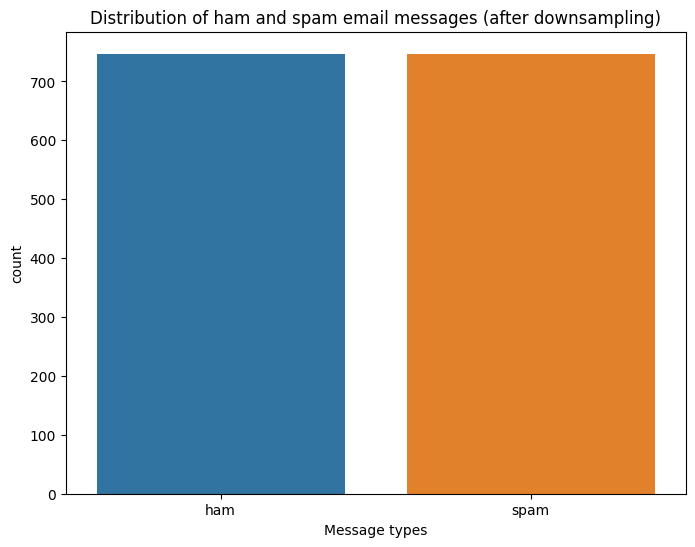

In [11]:
# Create a dataframe with these ham and spam msg
msg_df = ham_msg_df.append(spam_msg_df).reset_index(drop=True)
plt.figure(figsize=(8,6))
sns.countplot(data=msg_df,x="label")
plt.title('Distribution of ham and spam email messages (after downsampling)')
plt.xlabel('Message types')

In [12]:
# Get length column for each text
msg_df['text_length'] = msg_df['message'].apply(len)#Calculate average length by label types
labels = msg_df.groupby('label').mean()
labels

<ipython-input-12-f3712e9df1c5>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  labels = msg_df.groupby('label').mean()


,text_length
label,
ham,73.238286
spam,138.670683


In [13]:
#Map ham label as 0 and spam as 1
msg_df['msg_type']= msg_df['label'].map({'ham': 0, 'spam': 1})
msg_label = msg_df['msg_type'].values# Split data into train and test
train_msg, test_msg, train_labels, test_labels = train_test_split(msg_df['message'], msg_label, test_size=0.2, random_state=434)

In [14]:
# Defining pre-processing hyperparameters
max_len = 50
trunc_type = "post"
padding_type = "post"
oov_tok = "<OOV>"
vocab_size = 500

In [15]:
tokenizer = Tokenizer(num_words = vocab_size, char_level=False, oov_token = oov_tok)
tokenizer.fit_on_texts(train_msg)

In [16]:
# Get the word_index
word_index = tokenizer.word_index
word_index

{'<OOV>': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'i': 5,
 'call': 6,
 'the': 7,
 'u': 8,
 'your': 9,
 'for': 10,
 'is': 11,
 '2': 12,
 'and': 13,
 'now': 14,
 'free': 15,
 'or': 16,
 'on': 17,
 'in': 18,
 'ur': 19,
 'have': 20,
 '4': 21,
 'txt': 22,
 'of': 23,
 'are': 24,
 'with': 25,
 'me': 26,
 'from': 27,
 'text': 28,
 'get': 29,
 'my': 30,
 'it': 31,
 'stop': 32,
 'just': 33,
 'mobile': 34,
 'this': 35,
 'will': 36,
 'be': 37,
 'no': 38,
 'that': 39,
 'claim': 40,
 'reply': 41,
 'can': 42,
 'so': 43,
 'send': 44,
 'www': 45,
 'we': 46,
 'only': 47,
 'our': 48,
 'not': 49,
 'out': 50,
 'at': 51,
 'do': 52,
 'if': 53,
 'prize': 54,
 'new': 55,
 'go': 56,
 'cash': 57,
 'but': 58,
 '150p': 59,
 'uk': 60,
 '1': 61,
 'nokia': 62,
 'who': 63,
 't': 64,
 'all': 65,
 'win': 66,
 'please': 67,
 'won': 68,
 'up': 69,
 'tone': 70,
 'when': 71,
 "i'm": 72,
 'week': 73,
 'been': 74,
 'what': 75,
 'msg': 76,
 '50': 77,
 'com': 78,
 'urgent': 79,
 'how': 80,
 'service': 81,
 'phone': 82,
 'time': 83,
 

In [17]:
# check how many words
tot_words = len(word_index)
print('There are %s unique tokens in training data. ' % tot_words)

There are 4169 unique tokens in training data. 


In [18]:
# Sequencing and padding on training and testing
training_sequences = tokenizer.texts_to_sequences(train_msg)
training_padded = pad_sequences (training_sequences, maxlen = max_len, padding = padding_type, truncating = trunc_type )
testing_sequences = tokenizer.texts_to_sequences(test_msg)
testing_padded = pad_sequences(testing_sequences, maxlen = max_len,
padding = padding_type, truncating = trunc_type)

In [19]:
# Shape of train tensor
print('Shape of training tensor: ', training_padded.shape)
print('Shape of testing tensor: ', testing_padded.shape)


Shape of training tensor:  (1195, 50)
Shape of testing tensor:  (299, 50)


In [20]:
# Before padding
len(training_sequences[0]), len(training_sequences[1])

(27, 24)

In [21]:
# After padding
len(training_padded[0]), len(training_padded[1])

(50, 50)

In [22]:
print(training_padded[0])

[  1  47 186   9  34   1   3  24   1   2 274   2   7 152 275 135  34  10
  15   6   7  34 274  85  15  17   1   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]


In [23]:
vocab_size = 500 # As defined earlier
embeding_dim = 16
drop_value = 0.2 # dropout
n_dense = 24

In [24]:
#Create model
model = Sequential()
model.add(Embedding(vocab_size, embeding_dim, input_length=max_len))
model.add(GlobalAveragePooling1D())
model.add(Dense(24, activation='relu'))
model.add(Dropout(drop_value))
model.add(Dense(1, activation='sigmoid'))

#Compile model
model.compile(loss='binary_crossentropy',optimizer='adam' ,metrics=['accuracy'])

# Fit model
# fitting a dense spam detector model
num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(training_padded, train_labels, epochs=num_epochs, validation_data=(testing_padded, test_labels),callbacks =[early_stop], verbose=2)

Epoch 1/30
38/38 - 2s - loss: 0.6880 - accuracy: 0.7456 - val_loss: 0.6800 - val_accuracy: 0.8462 - 2s/epoch - 43ms/step
Epoch 2/30
38/38 - 0s - loss: 0.6654 - accuracy: 0.8753 - val_loss: 0.6481 - val_accuracy: 0.8495 - 126ms/epoch - 3ms/step
Epoch 3/30
38/38 - 0s - loss: 0.6144 - accuracy: 0.8862 - val_loss: 0.5848 - val_accuracy: 0.8528 - 135ms/epoch - 4ms/step
Epoch 4/30
38/38 - 0s - loss: 0.5294 - accuracy: 0.8887 - val_loss: 0.4933 - val_accuracy: 0.8696 - 114ms/epoch - 3ms/step
Epoch 5/30
38/38 - 0s - loss: 0.4305 - accuracy: 0.9004 - val_loss: 0.4054 - val_accuracy: 0.8763 - 129ms/epoch - 3ms/step
Epoch 6/30
38/38 - 0s - loss: 0.3455 - accuracy: 0.9054 - val_loss: 0.3382 - val_accuracy: 0.8863 - 128ms/epoch - 3ms/step
Epoch 7/30
38/38 - 0s - loss: 0.2841 - accuracy: 0.9188 - val_loss: 0.2910 - val_accuracy: 0.8930 - 124ms/epoch - 3ms/step
Epoch 8/30
38/38 - 0s - loss: 0.2417 - accuracy: 0.9264 - val_loss: 0.2529 - val_accuracy: 0.8997 - 136ms/epoch - 4ms/step
Epoch 9/30
38/38 -

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            8000      
                                                                 
 global_average_pooling1d (  (None, 16)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 8433 (32.94 KB)
Trainable params: 8433 (32.94 KB)
Non-trainable params: 0 (0.00 Byte)
______________________

In [26]:
model.save("model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [27]:
# Model performance on test data
model.evaluate(testing_padded, test_labels)

10/10 [==============================] - 0s 3ms/step - loss: 0.1167 - accuracy: 0.9398


[0.11671549826860428, 0.9397993087768555]

In [28]:
# Read as a dataframe
metrics = pd.DataFrame(history.history)
# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy', 'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)

def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])

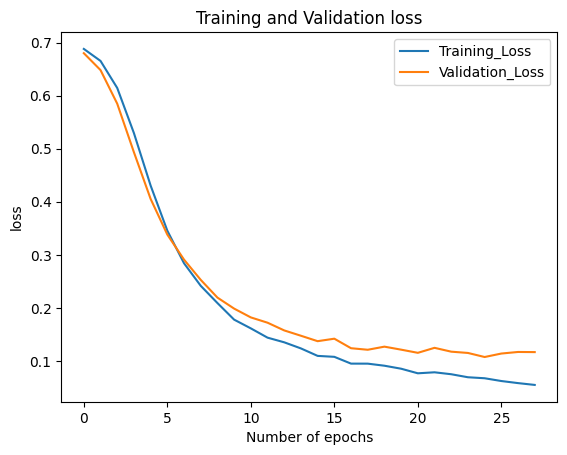

In [29]:
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')

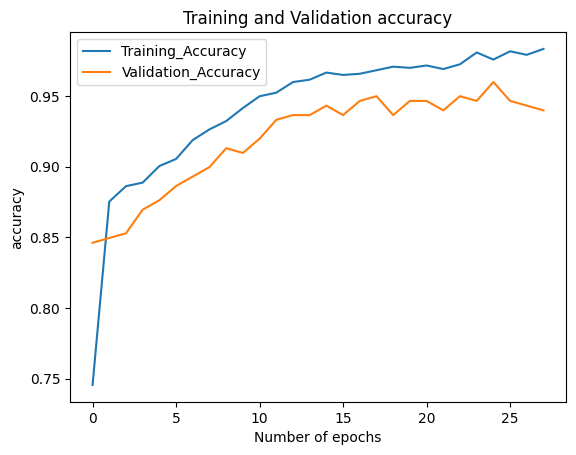

In [30]:
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

## Long Short Term Memory (LSTM) Model

In [31]:
#LSTM hyperparameters
n_lstm = 20
drop_lstm =0.2

add
model.add(Flatten())
OR
model.add(GlobalAveragePooling2D())

to match the output with the dimension of the label by adding a Flatten layer after the Dense layer:

https://stackoverflow.com/questions/48851558/tensorflow-estimator-valueerror-logits-and-labels-must-have-the-same-shape

In [33]:
#Cteate LSTM Spam detection model
model1 = Sequential()
model1.add(Embedding(vocab_size, embeding_dim, input_length=max_len))
model1.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
model1.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
model1.add(Dense(1, activation='sigmoid'))
model1.add(GlobalAveragePooling1D())

#Compile model
model1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])


# Fit model

num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=2)
history1 = model1.fit(training_padded, train_labels, epochs=num_epochs, validation_data=(testing_padded, test_labels),callbacks =[early_stop], verbose=2)

Epoch 1/30
38/38 - 11s - loss: 0.6474 - accuracy: 0.7322 - val_loss: 0.4974 - val_accuracy: 0.8161 - 11s/epoch - 277ms/step
Epoch 2/30
38/38 - 2s - loss: 0.3213 - accuracy: 0.9054 - val_loss: 0.2412 - val_accuracy: 0.9398 - 2s/epoch - 45ms/step
Epoch 3/30
38/38 - 2s - loss: 0.2207 - accuracy: 0.9406 - val_loss: 0.2626 - val_accuracy: 0.9231 - 2s/epoch - 45ms/step
Epoch 4/30
38/38 - 2s - loss: 0.1854 - accuracy: 0.9548 - val_loss: 0.1908 - val_accuracy: 0.9465 - 2s/epoch - 49ms/step
Epoch 5/30
38/38 - 2s - loss: 0.1499 - accuracy: 0.9657 - val_loss: 0.1629 - val_accuracy: 0.9565 - 2s/epoch - 65ms/step
Epoch 6/30
38/38 - 2s - loss: 0.1295 - accuracy: 0.9707 - val_loss: 0.1786 - val_accuracy: 0.9465 - 2s/epoch - 42ms/step
Epoch 7/30
38/38 - 2s - loss: 0.1161 - accuracy: 0.9757 - val_loss: 0.1577 - val_accuracy: 0.9465 - 2s/epoch - 44ms/step
Epoch 8/30
38/38 - 2s - loss: 0.1037 - accuracy: 0.9816 - val_loss: 0.1801 - val_accuracy: 0.9465 - 2s/epoch - 44ms/step
Epoch 9/30
38/38 - 2s - loss:

In [49]:
model1.save("model1.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


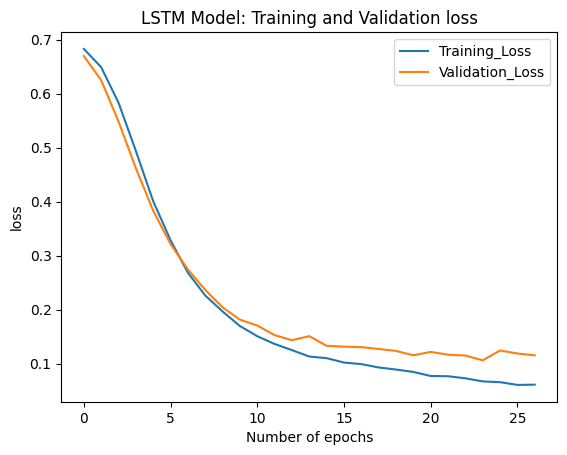

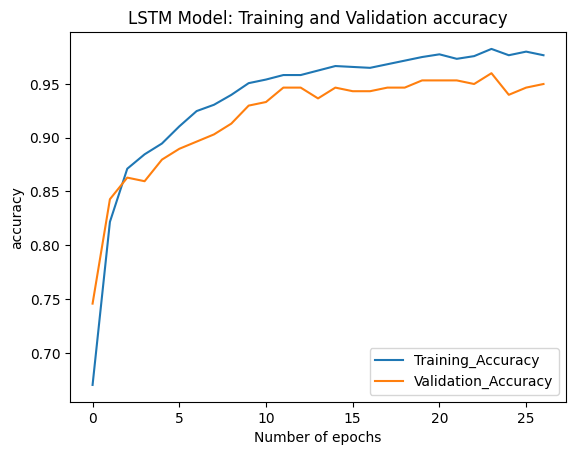

In [33]:
# Create a dataframe
metrics = pd.DataFrame(history.history)# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy',
                         'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('LSTM Model: Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])

plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

## Bi-directional Long Short Term Memory (BiLSTM) Model

In [38]:
# Create Biderectional LSTM Spam detection model
model2 = Sequential()
model2.add(Embedding(vocab_size, embeding_dim, input_length=max_len))
model2.add(Bidirectional(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True)))
model2.add(Dense(1, activation='sigmoid'))
model2.add(GlobalAveragePooling1D())

# Compile model
model2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

# Fit model
num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=2)
history2 = model2.fit(training_padded, train_labels, epochs=num_epochs,
                    validation_data=(testing_padded, test_labels),callbacks =[early_stop], verbose=2)

Epoch 1/30
38/38 - 8s - loss: 0.6805 - accuracy: 0.5431 - val_loss: 0.6277 - val_accuracy: 0.7492 - 8s/epoch - 199ms/step
Epoch 2/30
38/38 - 3s - loss: 0.4460 - accuracy: 0.8828 - val_loss: 0.3117 - val_accuracy: 0.8963 - 3s/epoch - 72ms/step
Epoch 3/30
38/38 - 2s - loss: 0.2473 - accuracy: 0.9230 - val_loss: 0.2245 - val_accuracy: 0.9231 - 2s/epoch - 40ms/step
Epoch 4/30
38/38 - 1s - loss: 0.1871 - accuracy: 0.9406 - val_loss: 0.2267 - val_accuracy: 0.9130 - 1s/epoch - 38ms/step
Epoch 5/30
38/38 - 1s - loss: 0.1463 - accuracy: 0.9523 - val_loss: 0.1636 - val_accuracy: 0.9465 - 1s/epoch - 39ms/step
Epoch 6/30
38/38 - 1s - loss: 0.1381 - accuracy: 0.9490 - val_loss: 0.1616 - val_accuracy: 0.9331 - 1s/epoch - 39ms/step
Epoch 7/30
38/38 - 1s - loss: 0.1000 - accuracy: 0.9690 - val_loss: 0.1530 - val_accuracy: 0.9298 - 1s/epoch - 39ms/step
Epoch 8/30
38/38 - 1s - loss: 0.0879 - accuracy: 0.9699 - val_loss: 0.3277 - val_accuracy: 0.8662 - 1s/epoch - 37ms/step
Epoch 9/30
38/38 - 2s - loss: 0

In [51]:
model2.save("model2.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


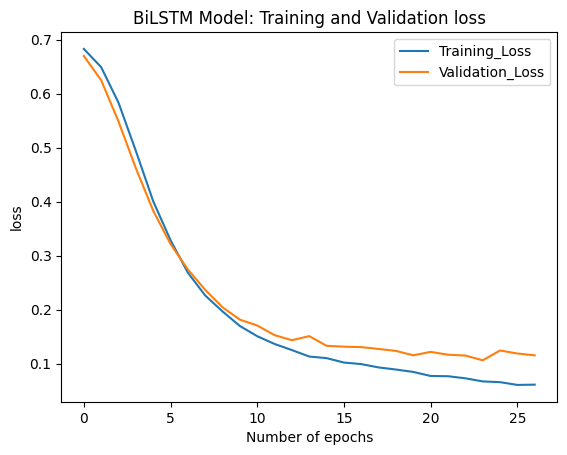

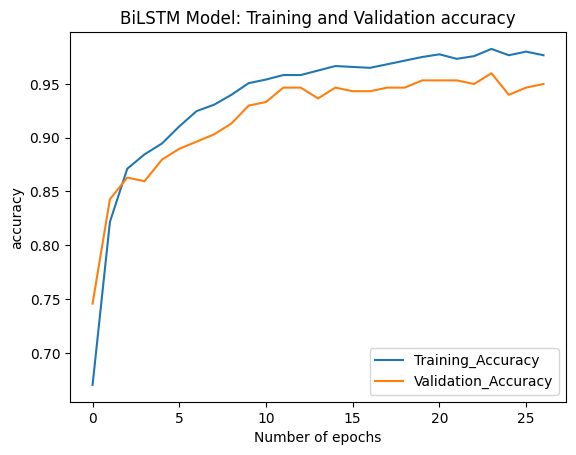

In [39]:
# Create a dataframe
metrics = pd.DataFrame(history.history)# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy',
                         'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('BiLSTM Model: Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])# Plot
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

In [40]:
# Comparing three different models
print(f"Dense architecture loss and accuracy: {model.evaluate(testing_padded, test_labels)} " )
print(f"LSTM architecture loss and accuracy: {model1.evaluate(testing_padded, test_labels)} " )
print(f"Bi-LSTM architecture loss and accuracy: {model2.evaluate(testing_padded, test_labels)} " )

10/10 [==============================] - 0s 7ms/step - loss: 0.1152 - accuracy: 0.9498
Dense architecture loss and accuracy: [0.11517364531755447, 0.9498327970504761] 
10/10 [==============================] - 0s 28ms/step - loss: 0.2018 - accuracy: 0.9465
LSTM architecture loss and accuracy: [0.20176903903484344, 0.9464883208274841] 
10/10 [==============================] - 0s 18ms/step - loss: 0.1283 - accuracy: 0.9565
Bi-LSTM architecture loss and accuracy: [0.12829381227493286, 0.95652174949646] 


# Predict spam/ham on new messages

## Test 1: Use raw text from our data:

In [41]:
# display long string
pd.options.display.max_colwidth=100
messages[:3]

,label,message
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...


In [42]:
predict_msg = ["Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",
          "Ok lar... Joking wif u oni...",
          "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"]

In [47]:
# Defining prediction functiondef predict_spam(predict_msg):
def predict_spam(predict_msg):
    new_seq = tokenizer.texts_to_sequences(predict_msg)
    padded = pad_sequences(new_seq, maxlen =max_len,
                      padding = padding_type,
                      truncating=trunc_type)
    return (model.predict(padded))

predict_spam(predict_msg)

1/1 [==============================] - 0s 107ms/step


array([[0.01091687],
       [0.00741078],
       [0.9998279 ]], dtype=float32)

## Test 2: Use newly created text message and see how the model classifies them.

In [48]:
# The third one gives 0.99 indicating very high probabilty of spam
predict_msg = ["You are awarded a Nikon Digital Camera. Call now",
               "Call me",
          "What's up?"]
predict_spam(predict_msg)

1/1 [==============================] - 0s 59ms/step


array([[0.92890173],
       [0.04491045],
       [0.01834699]], dtype=float32)

Our model correctly classifies the first message as spam (92% chance to be spam) were as the rest as ham.

# Add RNN

In [58]:
from tensorflow.keras.layers import SimpleRNN

#Cteate LSTM Spam detection model with RNN
model3 = Sequential()
model3.add(Embedding(vocab_size, embeding_dim, input_length=max_len))
model3.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
model3.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
model3.add(SimpleRNN(64)),
model3.add(Dense(1, activation='sigmoid'))
#model3.add(GlobalAveragePooling2D())

#Compile model
model3.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])


# Fit model

num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=2)
history3 = model3.fit(training_padded, train_labels, epochs=num_epochs, validation_data=(testing_padded, test_labels),callbacks =[early_stop], verbose=2)

Epoch 1/30
38/38 - 10s - loss: 0.5959 - accuracy: 0.7021 - val_loss: 0.4545 - val_accuracy: 0.8361 - 10s/epoch - 267ms/step
Epoch 2/30
38/38 - 2s - loss: 0.4644 - accuracy: 0.8025 - val_loss: 0.4271 - val_accuracy: 0.8127 - 2s/epoch - 61ms/step
Epoch 3/30
38/38 - 2s - loss: 0.3613 - accuracy: 0.8594 - val_loss: 0.3513 - val_accuracy: 0.8428 - 2s/epoch - 64ms/step
Epoch 4/30
38/38 - 3s - loss: 0.3113 - accuracy: 0.8728 - val_loss: 0.3823 - val_accuracy: 0.8428 - 3s/epoch - 90ms/step
Epoch 5/30
38/38 - 3s - loss: 0.2763 - accuracy: 0.8879 - val_loss: 0.3184 - val_accuracy: 0.8829 - 3s/epoch - 88ms/step
Epoch 6/30
38/38 - 2s - loss: 0.1989 - accuracy: 0.9238 - val_loss: 0.2032 - val_accuracy: 0.9164 - 2s/epoch - 65ms/step
Epoch 7/30
38/38 - 3s - loss: 0.1210 - accuracy: 0.9649 - val_loss: 0.2184 - val_accuracy: 0.9231 - 3s/epoch - 68ms/step
Epoch 8/30
38/38 - 4s - loss: 0.0895 - accuracy: 0.9707 - val_loss: 0.1577 - val_accuracy: 0.9365 - 4s/epoch - 93ms/step
Epoch 9/30
38/38 - 2s - loss:

# Add GRU


In [61]:
from tensorflow.keras.layers import GRU

#Cteate LSTM Spam detection model with RNN
model4 = Sequential()
model4.add(Embedding(vocab_size, embeding_dim, input_length=max_len))
model4.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
model4.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
model4.add(GRU(64))
model4.add(Dense(1, activation='sigmoid'))
#model3.add(GlobalAveragePooling2D())

#Compile model
model4.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])


# Fit model

num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=2)
history4 = model4.fit(training_padded, train_labels, epochs=num_epochs, validation_data=(testing_padded, test_labels),callbacks =[early_stop], verbose=2)

Epoch 1/30
38/38 - 13s - loss: 0.6512 - accuracy: 0.6159 - val_loss: 0.4809 - val_accuracy: 0.7993 - 13s/epoch - 351ms/step
Epoch 2/30
38/38 - 3s - loss: 0.2412 - accuracy: 0.9071 - val_loss: 0.1123 - val_accuracy: 0.9666 - 3s/epoch - 79ms/step
Epoch 3/30
38/38 - 3s - loss: 0.1130 - accuracy: 0.9598 - val_loss: 0.1693 - val_accuracy: 0.9431 - 3s/epoch - 82ms/step
Epoch 4/30
38/38 - 3s - loss: 0.1034 - accuracy: 0.9682 - val_loss: 0.1512 - val_accuracy: 0.9431 - 3s/epoch - 80ms/step


In [62]:
model4.save("model4.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
